In [7]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/home/nick/classwork_21_22/COMP755/COMP755FinalProj/Processing'

In [3]:
img_filenames = sorted(glob('../../img_align_celeba_cleaned/*'))
mask_filenames = sorted(glob('../../img_align_celeba_masks/*'))
save_dir = '../../img_align_celeba_256/'

In [4]:
len(img_filenames)

202228

In [5]:
len(mask_filenames)

202228

In [6]:
assert(len(img_filenames) == len(mask_filenames))


In [29]:
a = np.zeros((5,5))
im = Image.fromarray(a)

In [8]:
?np.argwhere

Signature: np.argwhere(a)
Docstring:
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : (N, a.ndim) ndarray
    Indices of elements that are non-zero. Indices are grouped by element.
    This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
    non-zero items.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
but produces a result of the correct shape for a 0D array.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``nonzero(a)`` instead.

Examples
--------
>>> x = np.arange(6).reshape(2,3)
>>> x
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argwhere(x>1)
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])
File:      ~/anaconda3/lib/python3.8/site-packages/numpy/core/numeric.py
Type:      function


In [22]:
def loc_from_binary_array(arr):
    # return loc = (top, right, bottom, left)
    mask_indices = np.argwhere(arr == 0)
    top = np.min(mask_indices[:,0])
    bottom = np.max(mask_indices[:,0])
    left = np.min(mask_indices[:,1])
    right = np.max(mask_indices[:,1])
    return (top, right, bottom, left)


In [23]:
img_dir = '../../img_align_celeba_cleaned/'
mask_dir = '../../img_align_celeba_masks/'
save_dir = '../../img_align_celeba_256/'
mask_files = sorted(glob(mask_dir + '*'))
img_files = sorted(glob(img_dir + '*'))
print(len(mask_files), len(img_files))

202228 202228


In [24]:
print(mask_files[0])

../../img_align_celeba_masks/000001.jpg_mask.npy


87600
28812
(76, 131, 173, 34)


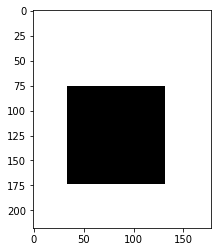

In [25]:
# test loc_from_binary_array
mask_arr = np.load(mask_files[0])
plt.imshow(mask_arr.astype(np.float32))
print(np.count_nonzero(mask_arr))
print(np.count_nonzero(1 - mask_arr))
print(loc_from_binary_array(mask_arr))

In [39]:
# try to zoom celeba imgs so that they are 256x256 and run
# inference on then with the model that was trained for celebahq imgs
img_arr = np.asarray(plt.imread(img_filenames[0]))
buf = (np.array((256,256,3)) - np.array(np.shape(img_arr))) // 2
# print(buf)
for i in range(len(img_filenames)):
    img_f = img_filenames[i]
    mask_f = mask_filenames[i]
    
    img_savename = os.path.join(save_dir, os.path.basename(img_f) + '_256.png')
    mask_savename = os.path.join(save_dir, os.path.basename(img_f) + '_256_mask.png')
    
    mask_arr = np.load(mask_f).astype(np.uint8)
    img_arr = np.asarray(plt.imread(img_f)).astype(np.uint8)
    new_img_arr = np.zeros((256,256,3), dtype=np.uint8)
    new_mask_arr = np.zeros((256,256,3), dtype=np.uint8)
    new_img_arr[buf[0]:-buf[0],buf[1]:-buf[1],:] = img_arr
    new_mask_arr[buf[0]:-buf[0],buf[1]:-buf[1],:] = mask_arr
    
    im_img = Image.fromarray(new_img_arr)
    im_mask = Image.fromarray(new_mask_arr)
    
    im_img.save(img_savename)
    im_mask.save(mask_savename)
    
#     plt.imshow(new_img_arr * new_mask_arr)
#     plt.imshow(img_arr*mask_arr)
#     print(np.shape(img_arr))
#     print(img_f, mask_f)
    break

0 1
